In [2]:
import nibabel as nib
import numpy as np
import subprocess
import os
import matplotlib.pyplot as plt
from twaidata.MRI_preprep.io import load_nii_img

In [25]:
# look at those relLes files
individual = "/home/s2208943/ipdis/data/core_data/EdData/CVD284/"
relles_file = individual + "masks/relLes.nii.gz"
flair_file = individual + "MRI/FLAIR.nii.gz"

In [26]:
flair, _ = load_nii_img(flair_file)
relles, _ = load_nii_img(relles_file)

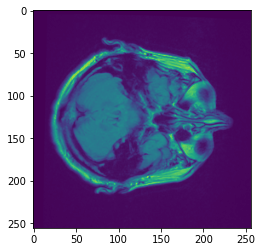

In [23]:
islice = 11
plt.imshow(flair[:,:,islice])
plt.show()

In [33]:
def plt_img(filepath, title, subplotargs, islice):
    plt.subplot(*subplotargs)
    img, _ = load_nii_img(filepath)
    plt.imshow(img[:,:,islice])
    plt.axis(False)
    plt.colorbar()
    plt.title(title)

In [24]:
FSLDIR = os.getenv('FSLDIR')

In [28]:
out_file = "/home/s2208943/ipdis/data/preprocessed_data/tests/bet_tests/CDV284_BET"
bet_command = [os.path.join(*[FSLDIR,'bin', 'bet2']), flair_file, out_file + "_1", "-m"]
_ = subprocess.call(bet_command)

In [31]:
bet_command = [os.path.join(*[FSLDIR,'bin', 'bet']), flair_file, out_file + "_2", "-m", "-S"]
_ = subprocess.call(bet_command)

In [32]:
bet_command = [os.path.join(*[FSLDIR,'bin', 'bet']), flair_file, out_file + "_3", "-m", "-S", "-R"]
_ = subprocess.call(bet_command)

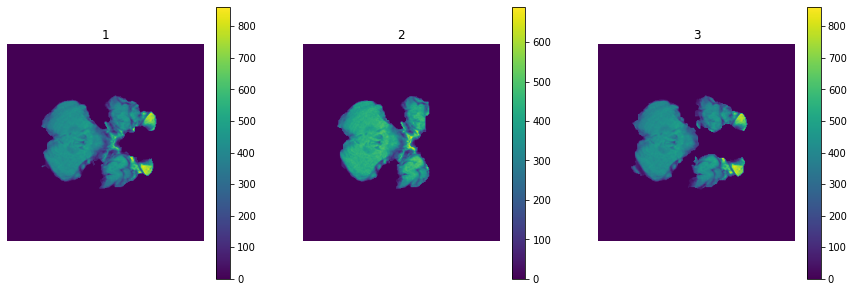

In [36]:
plt.figure(figsize=(15,5))
# check the three brain extractions:
plt_img(out_file + "_1.nii.gz", "1", [1,3,1], islice)
plt_img(out_file + "_2.nii.gz", "2", [1,3,2], islice)
plt_img(out_file + "_3.nii.gz", "3", [1,3,3], islice)